In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale as sk_scale
from sklearn.preprocessing import StandardScaler

In [2]:
PATH = os.getcwd()
DATAPATH = os.path.join(PATH, "data")
filenames = {
    "X_test": "test_in - Copy.csv",
    "X_train": "train_in - Copy.csv",
    "y_test": "test_out - Copy.csv",
    "y_train": "train_out - Copy.csv",
}


# Import all data files
X_train = pd.read_csv(os.path.join(DATAPATH, filenames["X_train"]), header=None)
y_train = pd.read_csv(
    os.path.join(DATAPATH, filenames["y_train"]), header=None, names=["digit"]
)
X_test = pd.read_csv(os.path.join(DATAPATH, filenames["X_test"]), header=None)
y_test = pd.read_csv(
    os.path.join(DATAPATH, filenames["y_test"]), header=None, names=["digit"]
)

In [14]:
def center_img(X, y, digit: int):
    """Calculate the center of the cloud in 256 dim space for `digit` using data `X` and labels `y`"""
    return X[y.digit == digit].mean()

def show_img(X, shape=(16,16)):
    """Show image of digit in `X`. Specifying the `shape` is optional"""
    plt.figure()
    plt.imshow(X.to_numpy().reshape(shape), cmap="Greys")
    plt.show()


def dist(src, dst):
    """Calculate the distance between `src` and `dst` using norm 2 distance"""
    return ((src - dst) ** 2).sum()


def classify(X_test, X_train=X_train, y_train=y_train):
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        distances = [dist(img, center) for center in centers]
        output.append(np.argmin(distances))
    return pd.DataFrame(output)


def accuraccy(y_test, y_out):
    return len(y_test[y_test.digit == y_out]) / len(y_test)


def calculate_distances(X_test, X_train=X_train, y_train=y_train) -> pd.DataFrame:
    """Classify all test cases in `X_test` using the training data `X_train` and labels `y_train`"""
    centers = [center_img(X_train, y_train, digit) for digit in range(10)]
    output = []
    for _, img in X_test.iterrows():
        output.append([dist(img, center) for center in centers])
    return pd.DataFrame(output)

def classify_dist_ij(dist_ij: pd.DataFrame, y: pd.DataFrame):
    """Classify all test cases using the distance matrix generated in `calculate_distances`"""
    return dist_ij.apply(np.argmin, axis=1).copy()

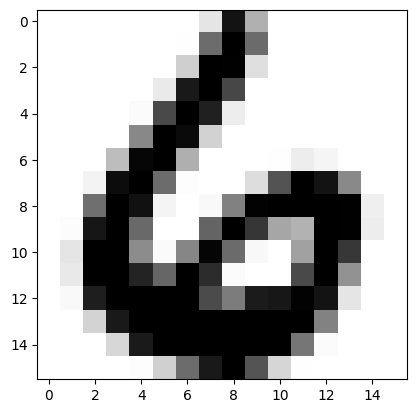

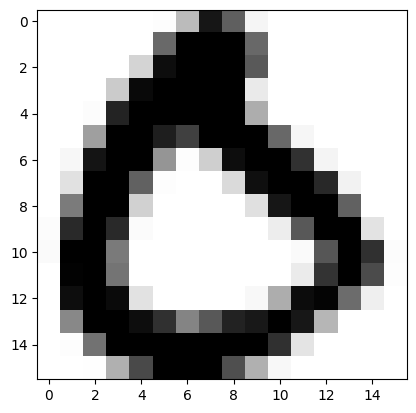

In [4]:
# Show first image in the training and test set to show data
show_img(X_train.iloc[0])
show_img(X_test.iloc[0])

# Task 1i: Calculate the centers

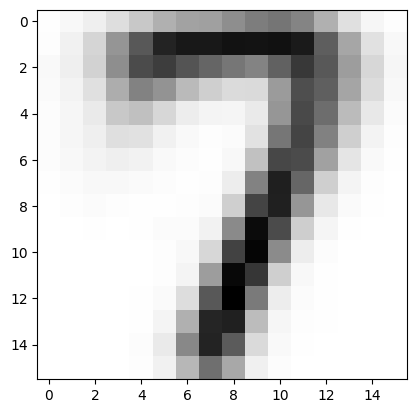

In [5]:
# Calculate center image of digits
center_7 = center_img(X_train, y_train, 7)
show_img(center_7)

# Task 1ii: Calculate the distances between the centers of the 10 clouds

In [15]:
dist_ij = calculate_distances(X_test)
y_out = classify_dist_ij(dist_ij, y_test)

In [16]:
y_out2 = classify(X_test)


0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [20]:
y_out2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 8, 5, 5, 4, 0, 9, 2,
       4, 6, 0, 9, 8, 0, 0, 6, 4, 0, 6, 6, 8, 0, 2, 2, 0, 0, 0, 0, 8, 8,
       6, 6, 0, 9, 0, 9, 0, 2, 0, 2, 2, 1, 2, 1, 6, 1, 2, 1, 5, 1, 6, 1,
       8, 3, 6, 0, 4, 8, 4, 0, 0, 1, 8, 4, 3, 0, 4, 6, 0, 1, 2, 6, 6, 6,
       3, 4, 0, 0, 6, 8, 2, 0, 1, 9, 9, 9, 9, 6, 6, 7, 7, 7, 7, 9, 9, 7,
       6, 8, 2, 7, 6, 8, 1, 0, 1, 1, 1, 6, 7, 6, 8, 0, 1, 9, 8, 1, 8, 6,
       8, 0, 8, 4, 0, 0, 0, 4, 4, 1, 3, 1, 6, 4, 1, 4, 1, 9, 6, 5, 2, 4,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 8, 1, 0, 0, 0, 7, 1, 0, 0, 1, 7, 1, 6,
       0, 2, 0, 1, 8, 9, 4, 1, 0, 1, 0, 8, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 6, 3, 1, 0, 0, 2, 2, 1, 0, 0, 2, 1, 1, 0, 6, 5, 4, 1, 8,
       0, 1, 0, 1, 0, 0, 0, 3, 1, 0, 0, 3, 0, 8, 9, 1, 6, 9, 8, 9, 1, 6,
       8, 8, 0, 3, 6, 8, 5, 7, 1, 1, 7, 0, 2, 8, 8, 7, 0, 4, 9, 5, 0, 2,
       8, 8, 9, 1, 6, 9, 2, 0, 7, 7, 0, 0, 8, 9, 9, 0, 7, 5, 9, 7, 9, 0,
       1, 9, 6, 5, 4, 4, 0, 0, 4, 9, 4, 8, 8, 8, 3,

In [7]:
pca = PCA(n_components=2, random_state=42)
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
pca_train = pd.DataFrame(pca.fit_transform(X_train_norm))
X_test_norm = scaler.fit_transform(X_test)
pca_test = pd.DataFrame(pca.fit_transform(X_test_norm))

y_out = classify(pca_test, X_train=pca_train)

In [8]:
accuraccy(y_test, y_out)

0.297